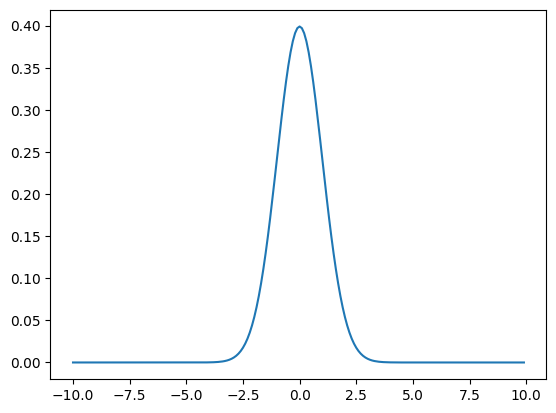

In [12]:
# Example 1.1: Plotting a normal distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x_axis = np.arange(-10, 10, 0.1)
y_axis = stats.norm.pdf(x_axis, 0, 1) # probability density function using mean 0 and standard deviation 1
plt.plot(x_axis, y_axis)
plt.show()


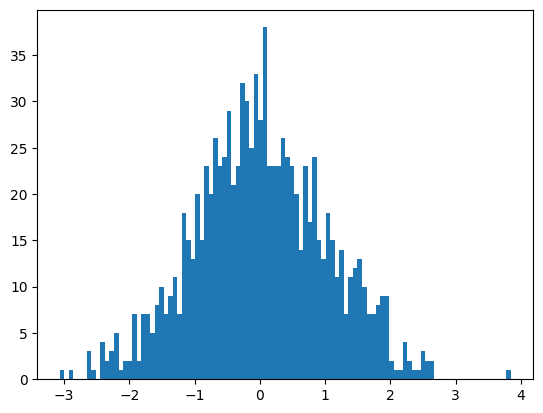

In [11]:
# Example 1.2: Plotting a normal distribution with random generated data
# x_axis = np.random.random(1000) # random data
# x_axis = np.arange(-10, 10, 0.1) # evenly spaced data
x_axis = np.random.normal(0, 1, 1000) # normally distributed data

plt.hist(x_axis, bins=100)
plt.show()

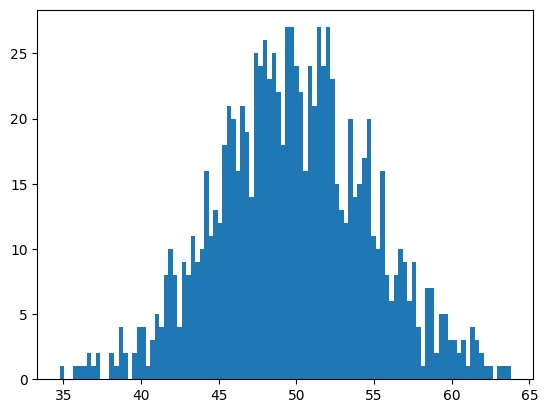

Mean:  49.77371646254902
Standard Deviation:  4.935165793345129


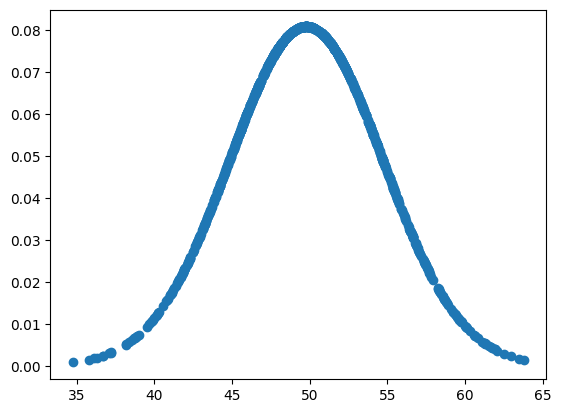

In [27]:
# Example 1.3: Generate random data with fixed seed
np.random.seed(0)
data = np.random.randn(1000)
data = 5*data + 50

plt.hist(data, bins=100)
plt.show()

print("Mean: ", np.mean(data))
print("Standard Deviation: ", np.std(data))

y_axis = stats.norm.pdf(data, np.mean(data), np.std(data))
plt.plot(data, y_axis, 'o')
plt.show()

Work on Car sale data

In [28]:
# Install kagglehub
!pip install kagglehub

   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/51.9 kB ? eta -:--:--
   --------------- ------------------------ 20.5/51.9 kB ? eta -:--:--
   ------------------------------- -------- 41.0/51.9 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 51.9/51.9 kB 534.4 kB/s eta 0:00:00


In [38]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("abdelrahmanahmed110/used-cars-for-sale-in-egypt")
data = pd.read_csv(path+"/hatla2ee_scraped_data.csv")

In [39]:
data.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    33559 non-null  object
 1   Price                   32625 non-null  object
 2   Color                   33559 non-null  object
 3   Mileage                 31440 non-null  object
 4   Make                    33559 non-null  object
 5   Model                   33559 non-null  object
 6   City                    33559 non-null  object
 7   Date Displayed          33559 non-null  object
 8   Automatic Transmission  33559 non-null  object
 9   Air Conditioner         33559 non-null  object
 10  Power Steering          33559 non-null  object
 11  Remote Control          33559 non-null  object
 12  Item URL                33559 non-null  object
dtypes: object(13)
memory usage: 3.3+ MB


In [42]:
data.dropna(inplace=True)

In [43]:
data.describe()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
count,31095,31095,31095,31095,31095,31095,31095,31095,31095,31095,31095,31095,31095
unique,3889,784,24,1084,99,851,103,124,2,2,2,2,20783
top,Nissan Sunny 2022,"650,000 EGP",Black,"200,000 Km",Hyundai,Sunny,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/spectra/628...
freq,644,962,6390,1312,3694,1847,3786,11087,20227,19359,17472,17993,289


In [45]:
data['Price'] = data['Price'].str.replace(' EGP', '')
data['Price'] = data['Price'].str.replace(',', '')
data['Price'] = data['Price'].astype(int)
data['Price']

0        2800000
2        1200000
3        2050000
4        2050000
5         700000
          ...   
33552     330000
33553     650000
33554     900000
33556    1170000
33557     285000
Name: Price, Length: 31095, dtype: int64

In [47]:
# change from mathemtical notation to scientific notation
pd.options.display.float_format = '{:.2f}'.format

In [48]:
data.describe()

,Price
count,31095.00
mean,940811.41
std,1048582.36
min,5000.00
25%,400000.00
50%,650000.00
75%,1050000.00
max,16250000.00
